<img src="portada.png" min-height=100% min-width=100% height=auto width=auto position=absolute top=-100% bottom=-100% left=-100% right=-100% margin=auto/>

<h2>Metodología</h2>
<ul>
    <li><i>Music21 (https://web.mit.edu/music21/)</i></li>
    <li><i>Jupyter Notebook (https://docs.jupyter.org/en/latest/)</i></li>
    <li><i>Jupyter Slides</i></li>
    <li><i>MyBinder (https://mybinder.readthedocs.io/en/latest/)</i></li>
</ul>

<h2> Configuración previa </h2>
<h4 style="color: red;">**   Es imprescindible que se ejecuten las primeras celdas antes de comenzar</h4>

In [25]:
from music21 import *
import os
import re
from ipywidgets import widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from melodia_general import rec_notas, get_finalis, get_mode, ambito, ambito_per_voice, mean_note, MT_relation, armadura_comparada, armadura
from ngramas import int_ngrams, split_ngrams, create_dict, simplify_ngrams
from base import flat_values, dic2txt, print_newlines
from acordes import chords
from collections import Counter
import pandas as pd

w = widgets.IntSlider(
    min=0,
    max=10,
    step=1)

v = widgets.IntText(
    min=0,
    max=10,
    step=1)
    
mylink = widgets.jslink((v, 'value'), (w, 'value'))

scan_dir = os.listdir()
dirr = [i for i in scan_dir if bool(re.search('krn', i)) == True or bool(re.search('.musicxml', i)) == True or bool(re.search('.mxl', i)) == True]

score1 = widgets.Dropdown(
    options= dirr,
    description='Selecciona una partitura:',
    disabled=False)

score2 = widgets.Dropdown(
    options= dirr,
    description='Selecciona una partitura:',
    disabled=False)

full_data = dict()

In [26]:
display(score1)
display(score2)

Dropdown(description='Selecciona una partitura:', options=('josquin_kyrie.musicxml', 'morales_kyrie.musicxml')…

Dropdown(description='Selecciona una partitura:', options=('josquin_kyrie.musicxml', 'morales_kyrie.musicxml')…

In [27]:
morales = converter.parse(score1.value)
josquin = converter.parse(score2.value)
########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Autor/a': [morales.metadata.composer, josquin.metadata.composer], 'Título': [morales.metadata.title, josquin.metadata.title]}
full_data.update(data)

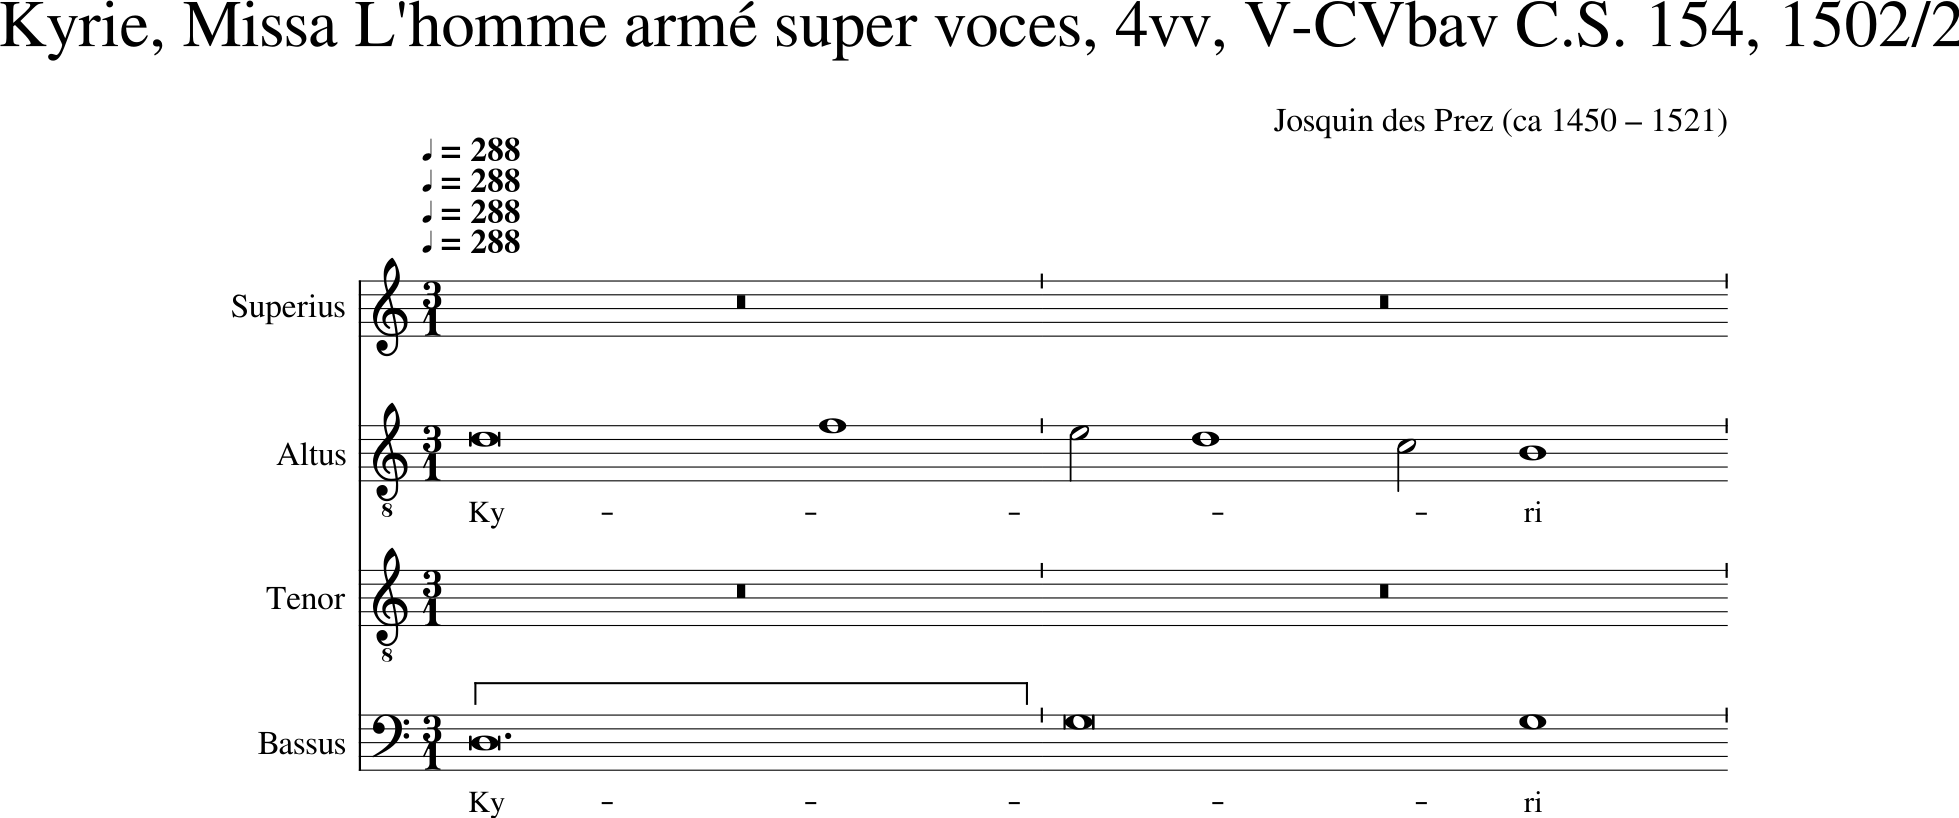

In [29]:
josquin.measures(1, 2).show()

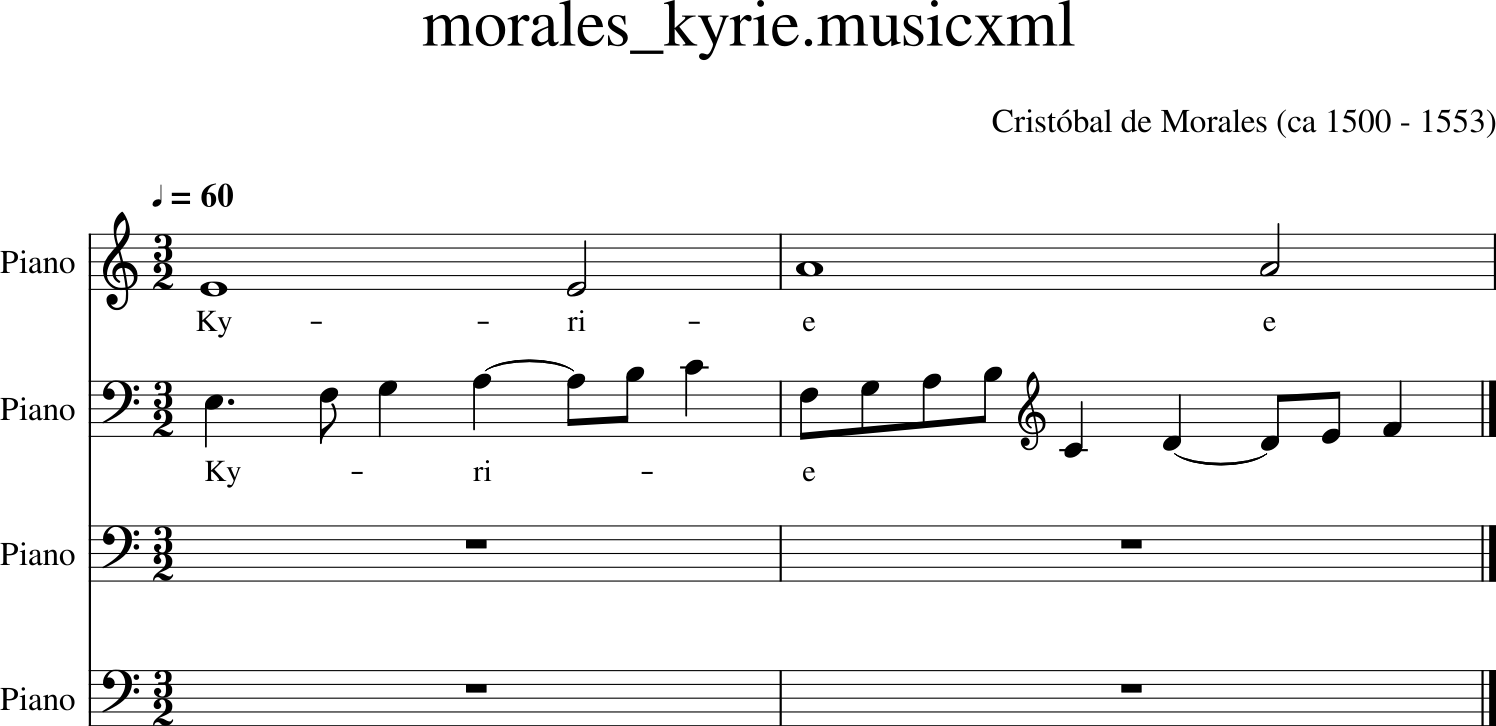

In [33]:
morales.measures(1, 2).show()

<h2>1) Tests de naturaleza melódica</h2>
<h3 style="color: #606060">   1.1) Comprobación de la nota finalis</h3>

In [34]:
# EN EL CASO DEL KYRIE DE MORALES

finalis1 = get_finalis(morales)

# EN EL CASO DEL KYRIE DE JOSQUIN

finalis2 = get_finalis(josquin)

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Finalis': [finalis1.name, finalis2.name]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título','Finalis') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
tmp_df

,Autor/a,Título,Finalis
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",E
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",D


<h2>   1.2) Comprobación de ámbito melódico total</h2>

In [35]:
# EN EL CASO DEL KYRIE DE MORALES

espectro_morales = ambito(morales)

# EN EL CASO DEL KYRIE DE JOSQUIN

espectro_josquin = ambito(josquin)

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Espectro melódico': [espectro_morales[0], espectro_josquin[0]], 'Tipo de espectro': [espectro_morales[1], espectro_josquin[1]]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título','Espectro melódico', 'Tipo de espectro') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
tmp_df

,Autor/a,Título,Espectro melódico,Tipo de espectro
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",G2 - D5,a voce piena
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",F2 - D5,a voce piena


<h2>   1.3) Comprobación de ámbito melódico por voces</h2>

In [36]:
# Téngase en cuenta que las composiciones a tratar en este prototipo están compuestas a dos voces.
# EN EL CASO DEL KYRIE DE MORALES

# ** 4 líneas, una dedicada a cada una de las voces. Véase que se escribe el nombre de cada una de ellas 
# en la correspondiente línea.

amb_morales1 = ambito_per_voice(morales, 'superius')[0].nameWithOctave + '-' + ambito_per_voice(morales, 'superius')[1].nameWithOctave
amb_morales2 = ambito_per_voice(morales, 'altus')[0].nameWithOctave + '-' + ambito_per_voice(morales, 'altus')[1].nameWithOctave
amb_morales3 = ambito_per_voice(morales, 'tenor')[0].nameWithOctave + '-' + ambito_per_voice(morales, 'tenor')[1].nameWithOctave
amb_morales4 = ambito_per_voice(morales, 'bassus')[0].nameWithOctave + '-' + ambito_per_voice(morales, 'bassus')[1].nameWithOctave

# EN EL CASO DEL KYRIE DE JOSQUIN

amb_josquin1 = ambito_per_voice(josquin, 'superius')[0].nameWithOctave + '-' + ambito_per_voice(josquin, 'superius')[1].nameWithOctave
amb_josquin2 = ambito_per_voice(josquin, 'altus')[0].nameWithOctave + '-' + ambito_per_voice(josquin, 'altus')[1].nameWithOctave
amb_josquin3 = ambito_per_voice(josquin, 'tenor')[0].nameWithOctave + '-' + ambito_per_voice(josquin, 'tenor')[1].nameWithOctave
amb_josquin4 = ambito_per_voice(josquin, 'bassus')[0].nameWithOctave + '-' + ambito_per_voice(josquin, 'bassus')[1].nameWithOctave

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Ámbito superius': [amb_morales1, amb_josquin1], 'Ámbito altus': [amb_morales2, amb_josquin2], 'Ámbito tenor': [amb_morales3, amb_josquin3], 'Ámbito bassus': [amb_morales4, amb_josquin4]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título','Ámbito superius', 'Ámbito altus', 'Ámbito tenor', 'Ámbito bassus') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
tmp_df


,Autor/a,Título,Ámbito superius,Ámbito altus,Ámbito tenor,Ámbito bassus
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",A3-D5,D3-A4,E3-F4,G2-C4
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",A3-D5,C3-G4,C3-D4,F2-C4


<h2>   1.4) Comprobación de notas centrales las voces</h2>

In [37]:
# EN EL CASO DEL KYRIE DE MORALES
# ** De nuevo, cada línea está una dedicada a una de las voces.

nota_c_s_mor = mean_note(morales, 'superius')
nota_c_a_mor = mean_note(morales, 'altus')
nota_c_t_mor = mean_note(morales, 'tenor')
nota_c_b_mor = mean_note(morales, 'bassus')


# EN EL CASO DEL KYRIE DE JOSQUIN

nota_c_s_jos = mean_note(josquin, 'superius')
nota_c_a_jos = mean_note(josquin, 'altus')
nota_c_t_jos = mean_note(josquin, 'tenor')
nota_c_b_jos = mean_note(josquin, 'bassus')

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Nota central superius': [nota_c_s_mor, nota_c_s_jos], 'Nota central altus': [nota_c_a_mor, nota_c_a_jos], 'Nota central tenor': [nota_c_t_mor, nota_c_t_jos], 'Nota central bassus': [nota_c_b_mor, nota_c_b_jos]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título','Nota central superius', 'Nota central altus', 'Nota central tenor', 'Nota central bassus') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
tmp_df

,Autor/a,Título,Nota central superius,Nota central altus,Nota central tenor,Nota central bassus
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",G4,C4,B3,E3
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",F4,B3,G3,D3


<h2>   1.5) ¿En qué modo están escritas las presentes obras?</h2>

In [38]:
# EN EL CASO DEL KYRIE DE MORALES

# * Nótese que debemos añadir a la variable finalis ".name" para obviar información innecesaria para el algoritmo.

mode1 = get_mode(morales, finalis1.name)

# EN EL CASO DEL KYRIE DE JOSQUIN

mode2 = get_mode(josquin, finalis2.name)

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Modo': [mode1, mode2]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título','Modo') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
tmp_df

,Autor/a,Título,Modo
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",Deuterus
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",Protus


<h2>   1.6) Notas más/menos usadas</h2>

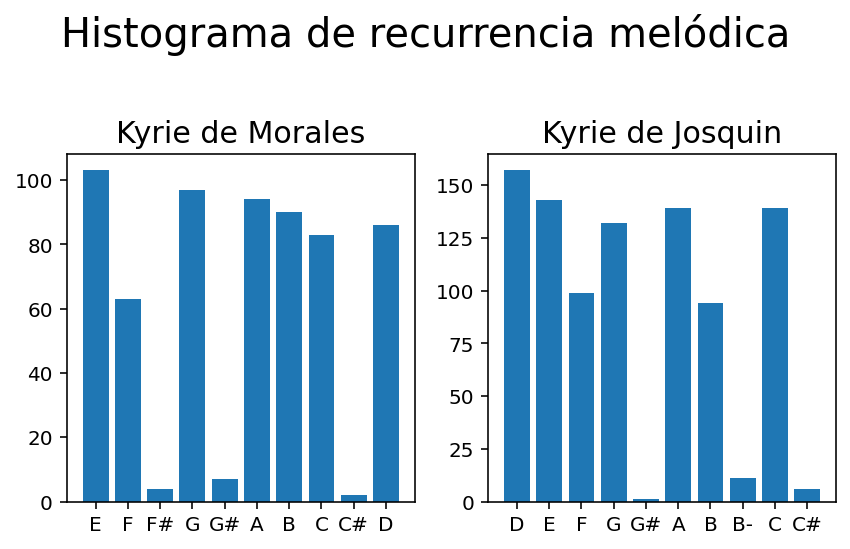

In [39]:
import matplotlib.gridspec as gridspec
# EN EL CASO DEL KYRIE DE MORALES
# * Aquí obtendremos un histograma ordenado desde la finalis hasta la nota más aguda

rec_notas_morales = rec_notas(morales, finalis1.name)
names1 = list(rec_notas_morales.keys())
values1 = list(rec_notas_morales.values())

# EN EL CASO DEL KYRIE DE JOSQUIN

rec_notas_josquin = rec_notas(josquin, finalis2.name)
names2 = list(rec_notas_josquin.keys())
values2 = list(rec_notas_josquin.values())

########################################################
###### Las siguientes líneas no deben modificarse ######

min_val_mor = min(values1)
max_val_mor = max(values1)
notas_min_mor = [k for k,v in rec_notas_morales.items() if v == min_val_mor]
notas_max_mor = [k for k,v in rec_notas_morales.items() if v == max_val_mor]
min_val_jos = min(values2)
max_val_jos = max(values2)
notas_min_jos = [k for k,v in rec_notas_josquin.items() if v == min_val_jos]
notas_max_jos = [k for k,v in rec_notas_josquin.items() if v == max_val_jos]

data = {'Notas más repetidas': [notas_max_mor, notas_max_jos], 'Notas menos repetidas': [notas_min_mor, notas_min_jos]}
full_data.update(data)

fig = plt.figure(1)
gs1 = gridspec.GridSpec(1, 2)
ax_list = [fig.add_subplot(ss) for ss in gs1]

ax_list[0].bar(range(len(rec_notas_morales)), values1, tick_label=names1)
ax_list[0].set_title('Kyrie de Morales', fontsize=15)

ax_list[1].bar(range(len(rec_notas_josquin)), values2, tick_label=names2)
ax_list[1].set_title('Kyrie de Josquin', fontsize=15)

fig.suptitle('Histograma de recurrencia melódica', fontsize=20)    

gs1.tight_layout(fig, rect=[0, 0.03, 1, 0.95])  
ax_list[0].set_box_aspect(1)
ax_list[1].set_box_aspect(1)
plt.show()

<h2>   1.7) Intervalos más/menos usados</h2>

In [40]:
# EN EL CASO DEL KYRIE DE MORALES
# * Cuatro: uno por cada voz.

ngrams1 = int_ngrams(morales, none_items=False)
ints_superius_morales = Counter(ngrams1[0])
ints_altus_morales = Counter(ngrams1[1])
ints_tenor_morales = Counter(ngrams1[2])
ints_bassus_morales = Counter(ngrams1[3])

# EN EL CASO DEL KYRIE DE JOSQUIN

ngrams2 = int_ngrams(josquin, none_items=False)
ints_superius_josquin = Counter(ngrams2[0])
ints_altus_josquin = Counter(ngrams2[1])
ints_tenor_josquin = Counter(ngrams2[2])
ints_bassus_josquin = Counter(ngrams2[3])

########################################################
###### Las siguientes líneas no deben modificarse ######
# * La configuración está predefinida para obras a cuatro voces.
d = [ints_superius_morales, ints_superius_josquin] * 2 + [ints_altus_morales, ints_altus_josquin] * 2 + [ints_tenor_morales, \
    ints_tenor_josquin] * 2 + [ints_bassus_morales, ints_bassus_josquin] * 2

t = ['Intervalos superius más repetidos', 'Intervalos superius menos repetidos', 'Intervalos altus más repetidos', 'Intervalos altus menos repetidos', 'Intervalos tenor más repetidos', 'Intervalos tenor menos repetidos',\
        'Intervalos bassus más repetidos', 'Intervalos bassus menos repetidos']
tags = list()
for i in t:
    tags.append(i)
    tags.append(i)

data = create_dict(d, tags, 4)
data = flat_values(data)
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título', 'Intervalos superius más repetidos', 'Intervalos superius menos repetidos', 'Intervalos altus más repetidos', 'Intervalos altus menos repetidos', 'Intervalos tenor más repetidos', 'Intervalos tenor menos repetidos',\
        'Intervalos bassus más repetidos', 'Intervalos bassus menos repetidos') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
print_newlines(tmp_df)

,Autor/a,Título,Intervalos superius más repetidos,Intervalos superius menos repetidos,Intervalos altus más repetidos,Intervalos altus menos repetidos,Intervalos tenor más repetidos,Intervalos tenor menos repetidos,Intervalos bassus más repetidos,Intervalos bassus menos repetidos
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",-2,+4+3,+2,-16+12,-2,+12+1,+2,+4+8
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-CVbav C.S. 154, 1502/2",-2,+4+8,+2,+4,-2,+12,+2,-12


<h2>   1.8) Secuencias melódicas más/menos usadas [ngramas]</h2>

<h4>A continuación, seleccione la longitud de la secuencia melódica que desea captar en la búsqueda</h4>
<h4 style="color: red;">   **   Es imprescindible que se seleccione un número antes de continuar.</h4>

In [41]:
display(w,v)

IntSlider(value=0, max=10)

IntText(value=0)

In [43]:
# EN EL CASO DEL KYRIE DE MORALES
# * Cuatro variables: una por cada voz.

ngram1 = split_ngrams(int_ngrams(morales, none_items=True), w.value)
ngram_superius_mor= Counter(ngram1[0])
ngram_altus_mor = Counter(ngram1[1])
ngram_tenor_mor = Counter(ngram1[2])
ngram_bassus_mor = Counter(ngram1[3])

mor_lst = [ngram_superius_mor, ngram_altus_mor, ngram_tenor_mor, ngram_bassus_mor]
x = dic2txt('morales_secs.txt', mor_lst, ['superius', 'altus', 'tenor', 'bassus'])

# EN EL CASO DEL KYRIE DE JOSQUIN

ngram2 = split_ngrams(int_ngrams(josquin, none_items=True), w.value)
ngram_superius_jos = Counter(ngram2[0])
ngram_altus_jos = Counter(ngram2[1])
ngram_tenor_jos = Counter(ngram2[2])
ngram_bassus_jos = Counter(ngram2[3])

jos_lst = [ngram_superius_jos, ngram_altus_jos, ngram_tenor_jos, ngram_bassus_jos]
dic2txt('josquin_secs.txt', mor_lst, ['superius', 'altus', 'tenor', 'bassus'])

########################################################
###### Las siguientes líneas no deben modificarse ######
# * La configuración está predefinida para obras a cuatro voces.

d = [ngram_superius_mor, ngram_superius_jos] * 2 + [ngram_altus_mor, ngram_altus_jos] * 2 + [ngram_tenor_mor, \
    ngram_tenor_jos] * 2 + [ngram_bassus_mor, ngram_bassus_jos] * 2

t = ['Ngramas superius más repetidos', 'Ngramas superius menos repetidos', 'Ngramas altus más repetidos', 'Ngramas altus menos repetidos', 'Ngramas tenor más repetidos', 'Ngramas tenor menos repetidos',\
        'Ngramas bassus más repetidos', 'Ngramas bassus menos repetidos']
tags = list()
for i in t:
    tags.append(i)
    tags.append(i)

data = create_dict(d, tags, 4)
data_pc = simplify_ngrams(data)
data = flat_values(data_pc)

full_data.update(data, dtype='Text')
tmp_dct = {k:full_data[k] for k in ('Autor/a', 'Título', 'Ngramas superius más repetidos', 'Ngramas superius menos repetidos', 'Ngramas altus más repetidos', 'Ngramas altus menos repetidos', 'Ngramas tenor más repetidos', 'Ngramas tenor menos repetidos',\
        'Ngramas bassus más repetidos', 'Ngramas bassus menos repetidos') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)

print_newlines(tmp_df)


,Autor/a,Título,Ngramas superius más repetidos,Ngramas superius menos repetidos,Ngramas altus más repetidos,Ngramas altus menos repetidos,Ngramas tenor más repetidos,Ngramas tenor menos repetidos,Ngramas bassus más repetidos,Ngramas bassus menos repetidos
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",==dDdd,=U=dd===dd=d=dd=du=d=dud==dudd=duddd=dduDd=duDdu=uDdud=DdudD=dudDu=udDu==ddudd=dddu==du=dd=u=ddd==dddU=dddUd=ddUdd=dUddd=Udddd=ddddd=ddddD=dddDU=ddDU==dDU=d=DU=dd=U=ddd=ddddU=ddduR=dduR==duR=d=uR=dd=R=dduR=ddud=ddudD=dudDD=udDDd=dDDdD=DDdD==DdD=d=dD=dD=D=dDd=Dddud=udddd=dddd==ddd=U=dd=Ud=d=Udd==Uddu=Uddu==du=dD=dDddD=DddDd=ddDdd=dDdd==Ddd=d=dd=dd=ddduU=dduU==duU===uU==u=U==uD===uDd==uDdd=uDddd=Ddddd=dddU==ddU===dU==d=U==dU===dU===dU=d=dU=dd==dddu=dddud=ddud==dud=d=ud=dd==dddD=dddDd=dDddu=DdduD=dduD==duD=d=uD=dd=D=ddd==dddR=dddRu=ddRud=dRudD=RudDuRudDu==u=dDU==dDUd=dDUdd=DUddd=dddUD=ddUDd=dUDdD=UDdD==DdD=D=dD=Dd=D=DdU==DdU==DdU=d=d=ddd==dddd=ddd=d=ddU=d=dU=dD=U=dDd==dDdu=dDdud=Ddudd=dudd==udd=d=dd=dD=d=dDd=dud=D=ud=Du=d=DuD==DuDd=DuDdu=dduDU=duDUd=uDUdd=DUdd==Udd=d,=dddud,=udd=d=dd=du=d=duD==duDd=duDdd=uDddd=Ddddu=ddud==dud=d=ud=du=d=dud==dudd=duddD=uddDU=ddDU==dDUdD=DUdDU=UdDUd=dDUdd=DUddd=Udddu=dddud=ddudd=duddd=uddd==ddd=d=dd=dD=d=dDd=dDdUd=DdUdU=dUdUD=UdUDd=dUDdd=UDddd=Ddddd=ddddR=dddRd=ddRd==dRd===Rd==dRd==d====d====d==d=d==dd===ddd==dddD=dddDu=ddDud=dDudD=DudDu=dDudd=Duddd=uddDd=ddDd==dDd=d=Dd=dD==dDdu=dDduD=DduDd=duDdD=uDdDU=DdDUd=dDUdu=DUduD=UduDd=duDd==uDd=d=Dd=dU=d=dUd==dUdd=dUddd=UdddU=dddUd=ddUdd=Udddd=ddddu=ddduD=dduDd=ddddU=UdddD=dddDU=dDU=d=DU=dU=U=dUd=dUddu=Uddud=ddudR=dudRU=udRU==dRU=D=RU=DURU=DUd==DUdD=UdDU==dDUd==DUd===Ud==d=d==dD===dDu==dDu==dDu=d=Du=dD=u=dDd==dDdU=dDdU==DdU=d=dU=dd=U=ddd==dddd=dddU==ddU=d=dU=d==U=d===ddddd=dU=dD=U=dDU==dDUd=ddudD=dudDU=udDUD=dDUDU=DUDUu=UDUu==DUu=d=Uu=dd=u=ddd=dddRD=ddRDu=dRDud=RDuddRDuddd=dudDu=dDud==Dud=d=ud=dD=U=dDu==dDud=Duddu=uddud=ddDdD=dDdDD=DdDDd=dDDdu=DDdud,==U=dd==d==d=d==d====d=D==d=DU,RD=U=d=U=dd===dd=d=dd=dR=d=dRU==dRU==dRU=D=RU=DRRU=DRU==DRU==DRU===RU==dRU==dd===ddd==dddd=dddd==ddd=U=dd=U==d=U=d==U=d==U=d===d=DU===DU=d=DU=d==d=DUu==DUud=DUud==Uud=d=ud=d==d=d=d==d=dd=d=ddD==ddD==ddD=U=dD=U==D=U=d=U=ddd==ddd==d=U=D==U=D==U=D=U==D=U==D=U====U==d=U==dd===dd==dd=dd=d=dd=,==dddU,RDdud==dud=d=ud=du=d=dud==dudu=dudud=ududd=dudd==udd=d=dd=du=d=du===du=d=du=dd=u=ddd==dddU=dddUd=ddUdD=dUdDu=UdDud=dDudD=DudD==udD=d=dD=dd=D=ddu==ddud=ddudD=dudDd=udDdU=dDdUR=DdUR==dUR===UR==u=R==udR==udD==udDU=udDU==dDU=D=DU=Du=U=DuD==DuDU=DuDUd=uDUdD=DUdDd=UdDdD=dDdDu=DdDuD=dDuDd=DuDdu=uDduU=DduU==duU=u=uU=ud=U=udd==udd==dd=dD=d=dDu==dDud=dDud==Dud=d=ud=dd=d=ddu=dudDR=udDRU=dDRU==DRU=U=RU=UdRU=Udd==UddD=UddDU=ddDU==dDU=d=DU=dD=U=dDU==dDU==DU=dd=U=ddD==ddDR=ddDRU=DRU=d=RU=dDRU=dDU==dDUd=dDUdD=UdDdu=dDdud=Ddudd=duddD=uddDU=ddDUR=dDUR==DUR=d=UR=dD=R=dDuR=dDu==dDu=d=Du=dD=u=dDU=DUdDU=UdDUd=dDUdd=DUddD=UddDd=ddDdd=dDddR=DddRU=ddRU==dRU=d=RU=ddRU=ddd==dddd=dddd==ddd=d=dd=dd=d=ddd=ddddU=dddUD=ddUDU=dUDU==UDU=d=U=ddd=dddU==ddU=d=dU=dd=dUdD==UdD=d=dD=du=D=dud==dudD=dudD==D=ddd==dddD=dddDd=ddDdu=dDduU
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-CVbav C.S. 154, 1502/2",=ddddd,R=U=dd=U=ddd=dddRU=ddRU==dRU=D=RU=DRRU=DRU==DRU==DRU===RU==dRU==dd===ddd=ddddd=ddddR=dddR==ddR=U=dR=Ud=R=UddR=Uddd=Udddd=ddddD=dddDU=ddDUd=DUddd=ddddU=dddUd=ddUdu=dUdud=udddU=udddD=dddDR=ddDRD=dDRDu=DRDud=RDuddRDuddD=uddDR=ddDRU=dDRUD=DRUDU=RUDUdRUDUdD=DUdDd=UdDdd=dDdd==Ddd=d=d=duU==duUd=duUdd=uUddd=Udddu=dddud=ddudu=duduD=uduDd=duDd==uDd=u=Dd=ud=d=ud===ud=d=ud=dd=ddRUU=dRUUd=RUUddRUUddu=ddudU=dudU==udU=d=dU=dd=dR=dd=R=dduR=ddud=ddudd=duddD=uddDU=dddu==ddu=R=du=R==u=R=d==R=dD=R=dDdR=dDdd=dDddU=DddUd=ddUdD=dUdDR=UdDR==dDR=d=DR=dD=ddUdd=dUddD=UddDU=dDUdd=dRU=d=RU=ddRU=ddu==ddud=dudu==udu=d=dddRd=ddRdd=dRddd=Rddd=Rddd=d=dd=dd=d=ddd==dddR=ddRUd=dRUdd=RUdd=RUdd=dRU=ddU==ddUd=dUdu==Udu=d=R=dddR=dddU=dddU==ddU=d=dU=dD=U=dDd==dDd==dDd=D=Dd=DU=d=DUd==DUd==DUd===U

<h2>2) Tests de naturaleza acórdica</h2>
<h3 style="color: #606060;">   2.1) Acordes  más/menos usados </h3>

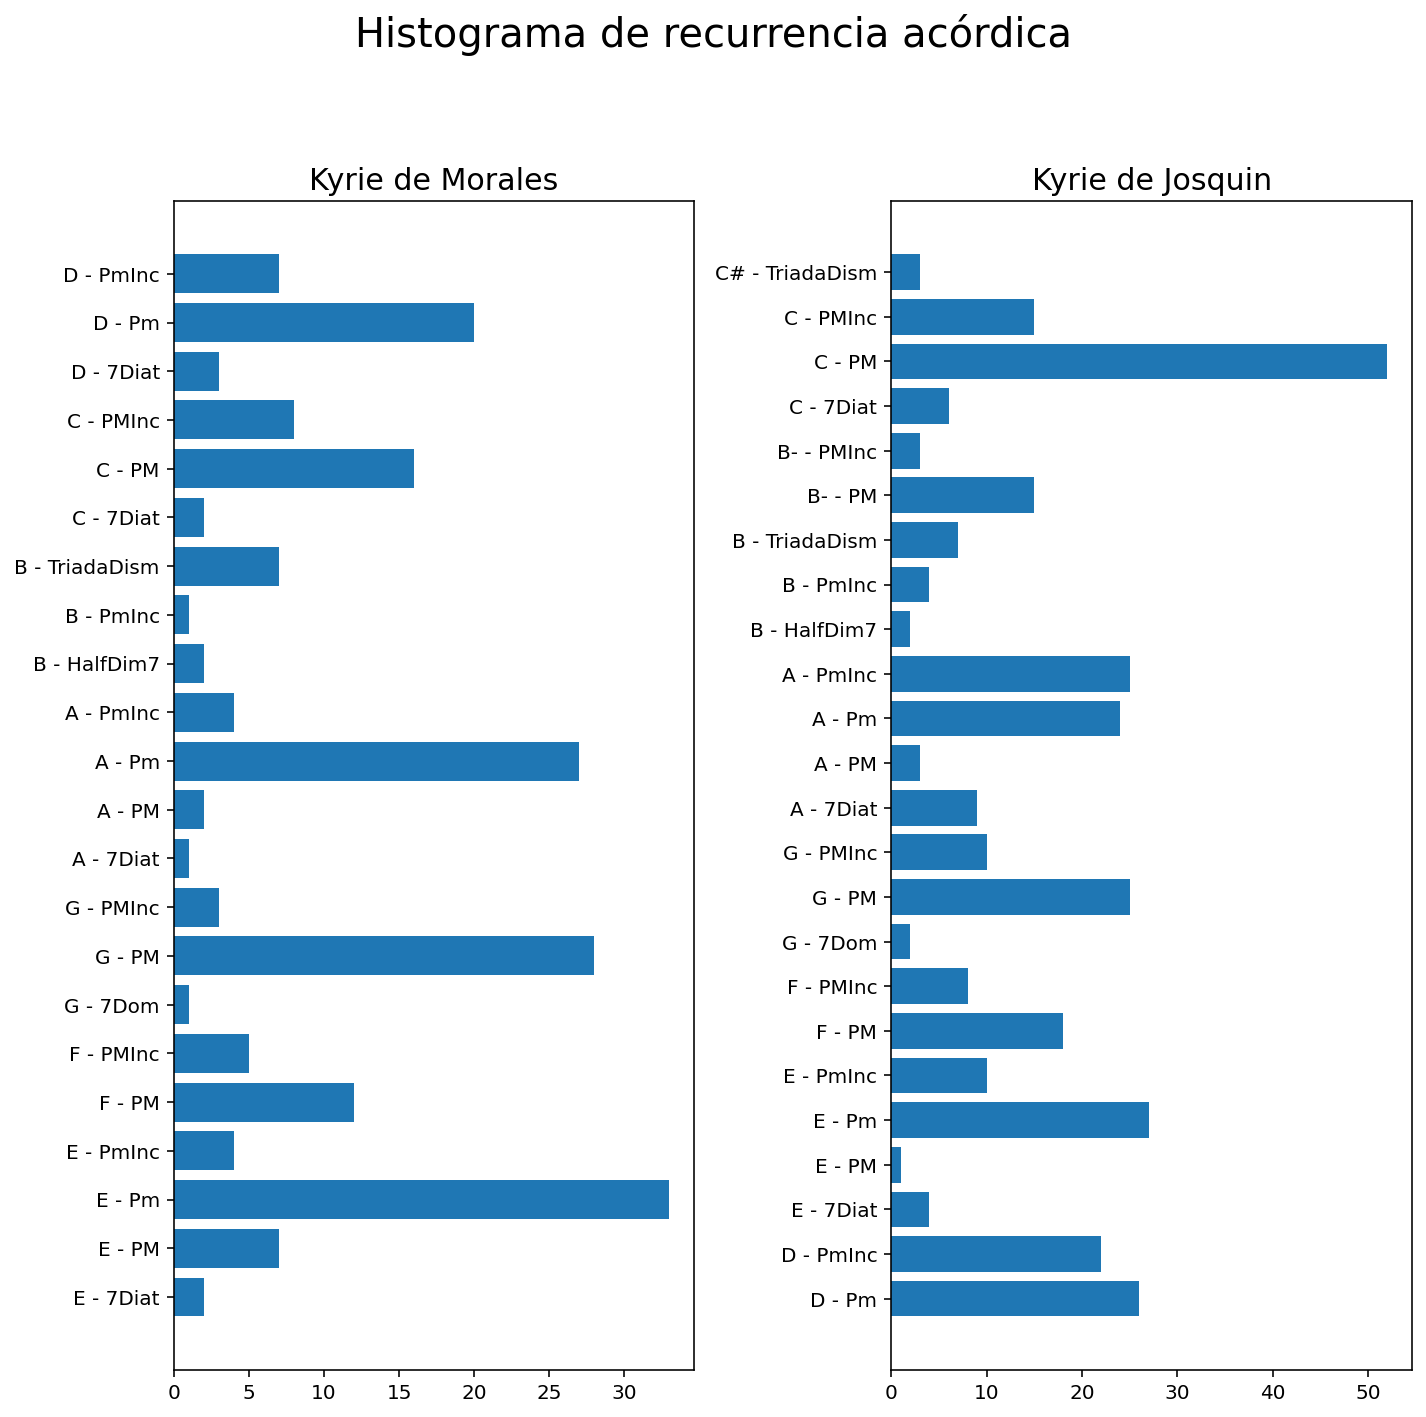

In [44]:
# EN EL CASO DEL KYRIE DE MORALES

acordes_morales = chords(morales)
namesmor = list(acordes_morales.keys())
valuesmor = list(acordes_morales.values())

# EN EL CASO DEL KYRIE DE JOSQUIN

acordes_josquin = chords(josquin)
namesjos = list(acordes_josquin.keys())
valuesjos = list(acordes_josquin.values())

########################################################
###### Las siguientes líneas no deben modificarse ######

min_ac_mor = min(valuesmor)
max_ac_mor = max(valuesmor)
acordes_min_mor = [k for k,v in acordes_morales.items() if v == min_ac_mor]
acordes_max_mor = [k for k,v in acordes_morales.items() if v == max_ac_mor]
min_ac_jos = min(valuesjos)
max_ac_jos = max(valuesjos)
acordes_min_jos = [k for k,v in acordes_josquin.items() if v == min_ac_jos]
acordes_max_jos = [k for k,v in acordes_josquin.items() if v == max_ac_jos]

data = {'Acordes más repetidos': [acordes_max_mor, acordes_max_jos], 'Acordes menos repetidos': [acordes_min_mor, acordes_min_jos]}
full_data.update(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
ax1.barh(range(len(acordes_morales)), valuesmor, tick_label=namesmor)
ax1.set_title('Kyrie de Morales', fontsize=15)
ax2.barh(range(len(acordes_josquin)), valuesjos, tick_label=namesjos)
ax2.set_title('Kyrie de Josquin', fontsize=15)
fig.suptitle('Histograma de recurrencia acórdica', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
#ax1.set_box_aspect(1)
#ax2.set_box_aspect(1)
plt.show()

<h2>3) Otras caraterísticas... </h2>
<h3 style="color: #606060;">   Relación música/texto</h3>

In [45]:
# EN EL CASO DEL KYRIE DE MORALES
# * Cuatro variables: una por cada voz.

mt_superius_mor = MT_relation(morales, 0)
mt_altus_mor = MT_relation(morales, 1)
mt_tenor_mor = MT_relation(morales, 2)
mt_bassus_mor = MT_relation(morales, 3)


# EN EL CASO DEL KYRIE DE JOSQUIN

mt_superius_jos = MT_relation(josquin, 0)
mt_altus_jos = MT_relation(josquin, 1)
mt_tenor_jos = MT_relation(josquin, 2)
mt_bassus_jos = MT_relation(josquin, 3)

########################################################
###### Las siguientes líneas no deben modificarse ######

data = {'Relación música/texto superius': [mt_superius_mor, mt_superius_jos], 'Relación música/texto altus': [mt_altus_mor, mt_altus_jos],\
        'Relación música/texto tenor': [mt_tenor_mor, mt_tenor_jos], 'Relación música/texto bassus': [mt_bassus_mor, mt_bassus_jos]}
full_data.update(data)
tmp_dct = {k:full_data[k] for k in ('Título','Relación música/texto superius', 'Relación música/texto altus', 'Relación música/texto tenor', 'Relación música/texto bassus') if k in full_data}
tmp_df = pd.DataFrame(tmp_dct)
print_newlines(tmp_df)

,Título,Relación música/texto superius,Relación música/texto altus,Relación música/texto tenor,Relación música/texto bassus
0,"Kyrie, Missa L'homme armé, 4vv, 1544b","{'Kyrie': -0.20467836257309943, 'eleison': -0.19865319865319872, 'Christe': 0.20512820512820504}","{'Kyrie': 0.2656434474616292, 'eleison': -0.26196172248803834, 'Christe': -0.11688311688311685}","{'Kyrie': 0.09259259259259246, 'eleison': -0.3472222222222222, 'Christe': -0.12}","{'Kyrie': -0.016666666666666666, 'eleison': 0.2653508771929824, 'Christe': -0.09999999999999998}"
1,"Kyrie, Missa L'homme armé super voces, 4vv, V-CVbav C.S. 154, 1502/2","{'Kyrie': 0.16959064327485363, 'eleison': -0.10465116279069765, 'Christe': 0.00952380952380949}","{'Kyrie': 0.4000000000000002, 'eleison': 0.177717391304348, 'Christe': -0.1313131313131313}","{'Kyrie': 0.10606060606060592, 'eleison': -0.06399999999999982, 'Christe': -1.0}","{'Kyrie': 0.08558558558558545, 'eleison': -0.03383838383838384, 'Christe': 0.33333333333333326}"


<h3>4) Finalizando</h3>
<h4 style="color: #606060">Será posible almacenar todos estos datos en hojas de cálculo.</h4>

In [46]:
full_table = pd.DataFrame(full_data)
full_table
full_table.to_excel('output.xlsx')
full_table

,Autor/a,Título,Finalis,Espectro melódico,Tipo de espectro,Ámbito superius,Ámbito altus,Ámbito tenor,Ámbito bassus,Nota central superius,...,Ngramas tenor menos repetidos,Ngramas bassus más repetidos,Ngramas bassus menos repetidos,dtype,Acordes más repetidos,Acordes menos repetidos,Relación música/texto superius,Relación música/texto altus,Relación música/texto tenor,Relación música/texto bassus
0,Cristóbal de Morales (ca 1500 - 1553),"Kyrie, Missa L'homme armé, 4vv, 1544b",E,G2 - D5,a voce piena,A3-D5,D3-A4,E3-F4,G2-C4,G4,...,RD=U=d\n=U=dd=\n==dd=d\n=dd=dR\n=d=dRU\n==dRU=...,==dddU,RDdud=\n=dud=d\n=ud=du\n=d=dud\n==dudu\n=dudud...,Text,[E - Pm],"[G - 7Dom, A - 7Diat, B - PmInc]","{'Kyrie': -0.20467836257309943, 'eleison': -0....","{'Kyrie': 0.2656434474616292, 'eleison': -0.26...","{'Kyrie': 0.09259259259259246, 'eleison': -0.3...","{'Kyrie': -0.016666666666666666, 'eleison': 0...."
1,Josquin des Prez (ca 1450 – 1521),"Kyrie, Missa L'homme armé super voces, 4vv, V-...",D,F2 - D5,a voce piena,A3-D5,C3-G4,C3-D4,F2-C4,F4,...,Rd=U=d\n==U=dd\n=U=ddd\n==dddd\n=ddddR\n=dddRU...,=ddudd\n=duddu\n==ddud\n=dd==U\n==dddR\n=ddduD...,=U=ddd\n==dddd\n=ddddd\n=ddddU\n=dddUD\n=ddUDd...,Text,[C - PM],[E - PM],"{'Kyrie': 0.16959064327485363, 'eleison': -0.1...","{'Kyrie': 0.4000000000000002, 'eleison': 0.177...","{'Kyrie': 0.10606060606060592, 'eleison': -0.0...","{'Kyrie': 0.08558558558558545, 'eleison': -0.0..."


<h2> Referencias bibliográficas </h2>
<ul>
<li>"Binder Documentation," Binder, acceso en 2 Febrero, 2022, https://mybinder.readthedocs.io/en/latest/.</li>

<li>"Jupyter Project Documentation," Jupyter Project, acceso en 20 Febrero, 2022, https://docs.jupyter.org/en/latest/.</li>

<li>"music21: a toolkit for computer-aided musicology," Massachusetts Institute of Techonology, acceso en 12 Febrero, 2022, https://web.mit.edu/music21/.</li>

<li>"GitHub Docs: Quickstart," GitHub, acceso en 4 Marzo, 2022, https://docs.github.com/en/get-started/quickstart.</li>

<li>"Python 3.10.3 documentation," Python, acceso en 8 Marzo, 2022, https://docs.python.org/3/.</li>

<li>"Tomás Luis de Victoria," Universidad de Málaga, acceso en 28 Enero, 2022, https://www.uma.es/victoria/.</li>

<li>Josquin des Prés, "Kyrie", en Missa L'homme armé super voces musicales, edited by Hitoshi Yamamoto (Choral Public Domain Library, 2016). https://www.cpdl.org/wiki/index.php/Missa_L'homme_armé_super_voces_musicales.</li>

<li>Cristóbal de Morales, "Kyrie", en Missa l'Homme armé 4v, edited by Nancho Álvarez (Málaga: Universidad de Málaga). https://www.uma.es/victoria/morales/pdf/Morales-Lhomme_Arme-a4-1-Kyrie.pdf.</li>

<li>Samuel Rubio Calzón, Cristóbal de Morales. Estudio crítico de su polifonía (San Lorenzo de El Escorial: Biblioteca La Ciudad de Dios, 1969).</li>

<li>Bernhard Meier, The Modes of Classical Vocal Polyphony, trad. Ellen S. Beebe (Nueva York: Broude Brothers Limited, 1988).</li>

<li>"Themax manpage", Center for Computer Assisted Research for Humanities, acceso en 27 Marzo, 2022, http://extras.humdrum.org/man/themax/.</li>

<li>Denys Parsons, The Directory of Classical Themes (London: Piatkus Books, 2008).</li>
</ul>